# 1.What is a jointplot in Seaborn?
🔹 sns.jointplot() is a figure-level function in Seaborn that creates:

A scatter plot (or other bivariate plot) between two numerical variables

Along with their individual distributions (histogram, KDE, etc.) shown on the top and right axes

# 2. Why do we use jointplot?
<table>
    <tr>
        <th>Purpose</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Explore Relationships</td>
        <td>Shows how two numeric variables relate (linear, nonlinear, clusters?)</td>
    </tr>
    <tr>
        <td>See Distributions</td>
        <td>Also shows each variable's distribution with hist or KDE</td>
    </tr>
    <tr>
        <td>Compact View</td>
        <td>Combines multiple charts into one easy-to-read plot</td>
    </tr>
    <tr>
        <td>Compare Groups (with hue)</td>
        <td>	Useful for comparing subgroups (like gender, branch, etc.)</td>
    </tr>
</table>

# 3. Is It Important?
It helps you quickly answer:

Is there correlation between X and Y?

Are there outliers?

How are the values distributed?

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# import dataset 
def load_dataset(df_name, file_path):
    file_path = file_path
    df_name = df_name
    
    df_name = pd.read_csv(file_path)
    if df_name is None:
        raise FileNotFoundError("File Path Not Found")
    
    df = pd.DataFrame(df_name)
    return df

# assign
df = load_dataset(file_path= r"D:\DataVisualizationForPython\datasets\supermarket_sales_utf8.csv",df_name = "sales")

In [7]:
# fix column names
def fix_column_names(dataframe):
    dataframe.columns = [col.lower().replace(" ", "_") for col in dataframe.columns]
    
# call the fix_column_names
fix_column_names(df)
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


In [8]:
# find numeric calls
num_cols = [col for col in df.columns if df[col].dtype in ['float', "int"]]
print(num_cols)

['unit_price', 'tax_5%', 'total', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating']


<Figure size 1000x600 with 0 Axes>

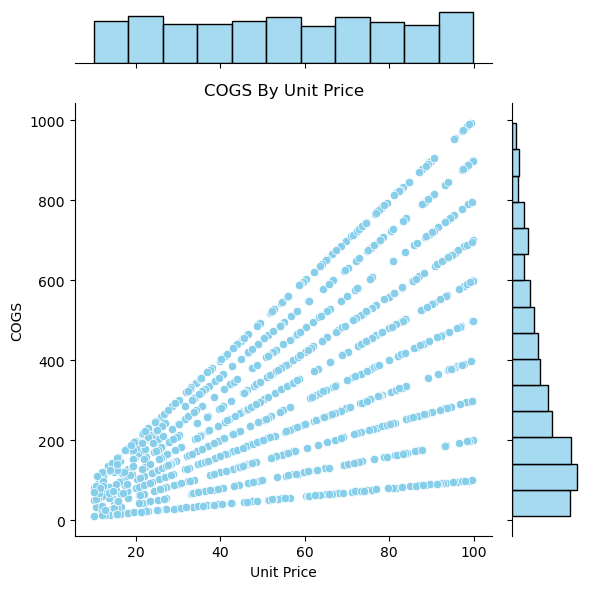

In [10]:
# 
plt.figure(figsize = (10, 6))
sns.jointplot(data = df, x = "unit_price", y ="cogs", color = "skyblue")
plt.title("COGS By Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("COGS")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

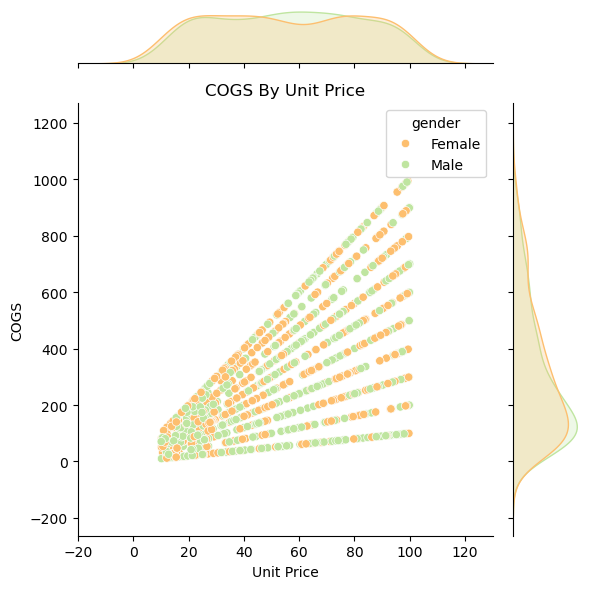

In [12]:
plt.figure(figsize = (10, 6))
sns.jointplot(data = df, x = "unit_price", y ="cogs", hue = "gender", palette= "Spectral")
plt.title("COGS By Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("COGS")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

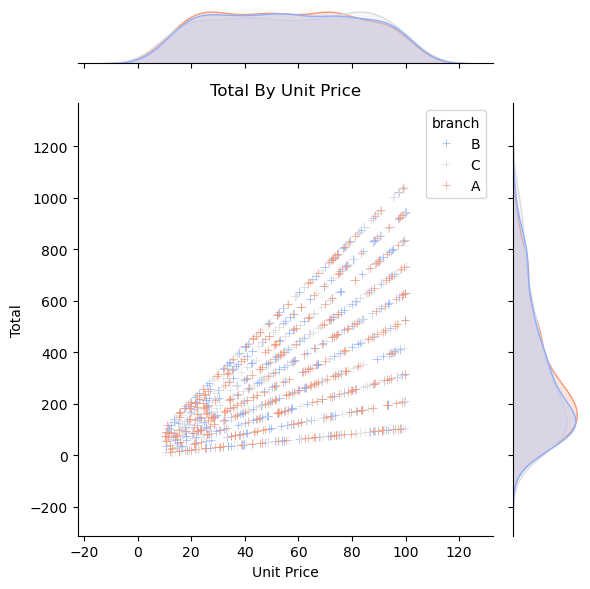

In [20]:
plt.figure(figsize = (10, 6))
sns.jointplot(data = df, 
              x = "unit_price", 
              y ="total", 
              hue = "branch", 
              palette= "coolwarm",
              joint_kws= dict(
                  marker = "+",
                  color = "black"
                  ),
              marginal_kws= dict(
                  color = "blue"
              )
              )
plt.title("Total By Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Total")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

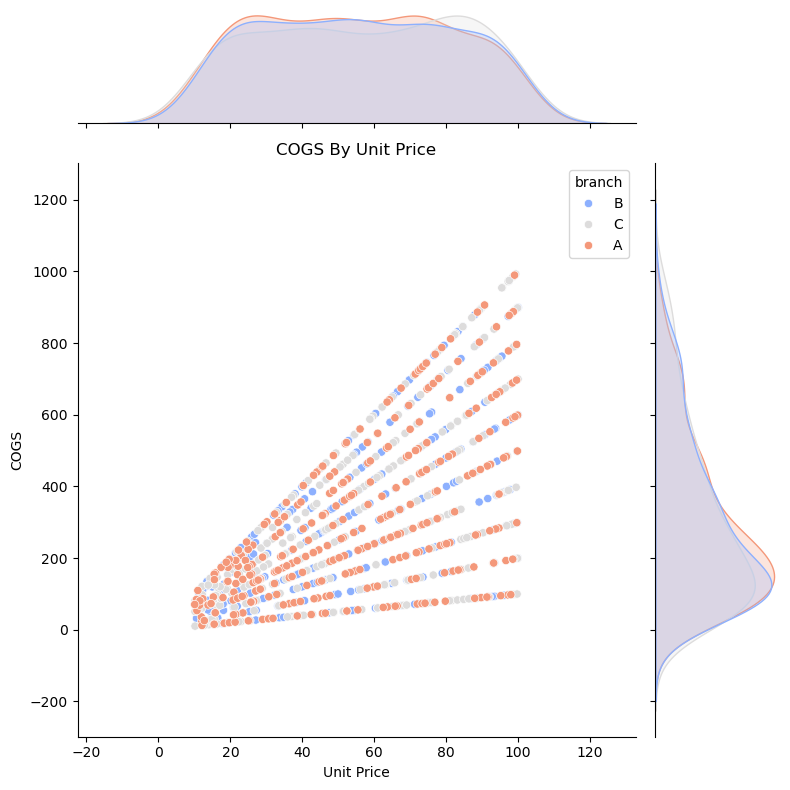

In [27]:
# heigt and ratio attributes
plt.figure(figsize = (10, 6))
sns.jointplot(data = df, x = "unit_price", y ="cogs", hue = "branch", palette= "coolwarm", height = 8, ratio = 4)
plt.title("COGS By Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("COGS")
plt.tight_layout()
plt.show()